# Part I - Prosper Loan Data Exploration
## by Job Wachira

## Introduction
 This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read the data into a data frame 
loans = pd.read_csv("prosperLoanData.csv")

#Check the shape of the data and distribution of numeriacal variables
print(loans.shape)
loans.describe()

(113937, 81)


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The dataset contains 113,937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest for me are `Term`, `MonthlyLoanPayment`, `BorrowerAPR`, `ProsperScore` and `IsBorroweHomeowner`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features below will help me take a deeper look into the main features of interest;
`BorrowerRate`, `ProsperScore`, `ListingCategory (numeric)`, `Occupation`, `EmploymentStatus`, `CreditScoreRangeLower`, `CreditScoreRangeUpper`, `IncomeRange`, `LoanOriginalAmount`, `OpenCreditLines`, `OpenRevolvingAccounts` and `StatedMonthlyIncome`.

### Wrangle the table to remain with only the features required for analysis.

In [4]:
'''Remove the columns not needed to remain with leaner frame for analysis. Work on a copy.'''
loans_df = loans.copy()

loans_df = loans_df.loc[:,['LoanOriginationDate','Term','BorrowerAPR','BorrowerRate','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','IncomeRange', 'OpenCreditLines', 'OpenRevolvingAccounts','LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome']]
print(loans_df.shape)
loans_df.info()


(113937, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   CreditScoreRangeLower      113346 non-null  float64
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  OpenCreditLines            106333 non-null  float64
 13  OpenRevolvingAcc

In [5]:
# check for duplicates
loans_df.duplicated().value_counts()

False    113937
dtype: int64

In [6]:
# no duplicates so no need to drop duplicates and null values
#loans_df.drop_duplicates(inplace=True)

#print(loans_df.duplicated().value_counts())

#drop missing values to remain with a complete subset for visualisation
loans_df.dropna(inplace = True)

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanOriginationDate        83520 non-null  object 
 1   Term                       83520 non-null  int64  
 2   BorrowerAPR                83520 non-null  float64
 3   BorrowerRate               83520 non-null  float64
 4   ProsperScore               83520 non-null  float64
 5   ListingCategory (numeric)  83520 non-null  int64  
 6   Occupation                 83520 non-null  object 
 7   EmploymentStatus           83520 non-null  object 
 8   IsBorrowerHomeowner        83520 non-null  bool   
 9   CreditScoreRangeLower      83520 non-null  float64
 10  CreditScoreRangeUpper      83520 non-null  float64
 11  IncomeRange                83520 non-null  object 
 12  OpenCreditLines            83520 non-null  float64
 13  OpenRevolvingAccounts      83520 non-null  in

In [7]:
#change the data type of the loan origination date to datetime
loans_df['LoanOriginationDate'] = loans_df['LoanOriginationDate'].astype('datetime64')
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   LoanOriginationDate        83520 non-null  datetime64[ns]
 1   Term                       83520 non-null  int64         
 2   BorrowerAPR                83520 non-null  float64       
 3   BorrowerRate               83520 non-null  float64       
 4   ProsperScore               83520 non-null  float64       
 5   ListingCategory (numeric)  83520 non-null  int64         
 6   Occupation                 83520 non-null  object        
 7   EmploymentStatus           83520 non-null  object        
 8   IsBorrowerHomeowner        83520 non-null  bool          
 9   CreditScoreRangeLower      83520 non-null  float64       
 10  CreditScoreRangeUpper      83520 non-null  float64       
 11  IncomeRange                83520 non-null  object        
 12  Ope

## Univariate Exploration


#### To better understand the data, we will first perform some univariate analaysis on some of the features noting their distribution.

We will try and answer the following questions:

1. What is the ratio of different loan terms?
2. What is the distribution of the loan?
3. What percentage of borrowers are home owners?
4. What is the distribution of the borrower APR?
5. What is the distribution of prosper score for the different loans?

1. What is the ratio of different loan terms?

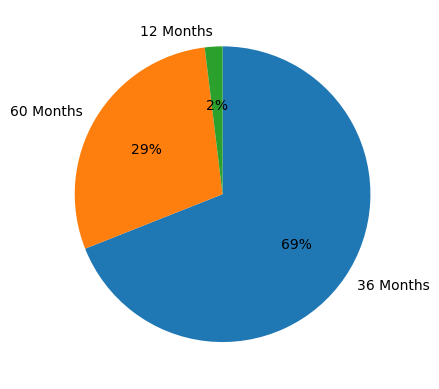

In [8]:
#create a pie chart to show how the loan terms are distributed.
term_ratios =  loans_df['Term'].value_counts()
plt.pie(term_ratios, startangle=90, labels=[(str(term_ratio) + ' Months') for term_ratio in term_ratios.index], counterclock=False, autopct='%1.f%%');

We can observe that around 69% of loans have a 36 month term whith 60 months being the second term with most loans at 29% and around 1 percent of loans have a 1 year term.

2. What is the distribution of loan status?

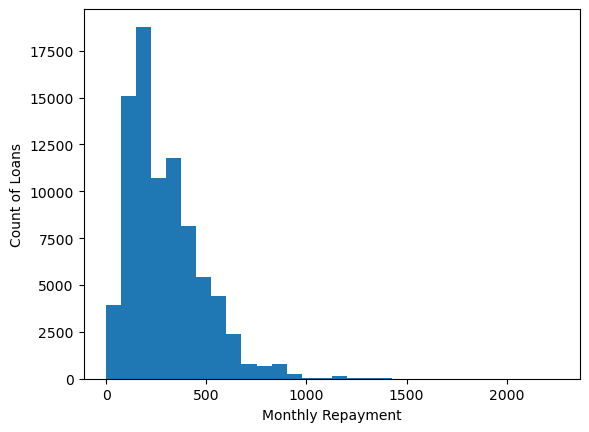

In [9]:
# create a count plot for the different loan distributions.
plt.hist(loans_df['MonthlyLoanPayment'], bins=30);
plt.xlabel('Monthly Repayment')
plt.ylabel('Count of Loans');

We see that most loan monthly loan repayment for most loans is less than a 1000 dollars with a positive skew.

3. What percentage of borrowes are home owners?

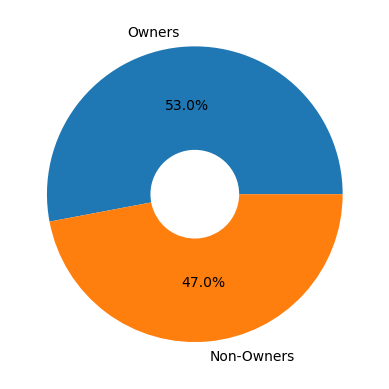

In [10]:
homeownership = loans_df['IsBorrowerHomeowner'].value_counts()
plt.pie(homeownership, wedgeprops={'width': 0.7}, counterclock=True, autopct='%1.1f%%',labels=['Owners', 'Non-Owners']);


In our subset of the data, 53% of loans were given to home-owners while 47% were issued to non home-owners.

Text(0, 0.5, 'count of loans')

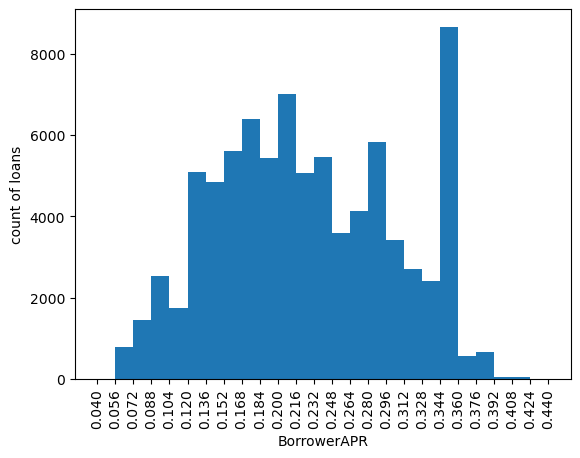

In [11]:
bin_edges = np.arange( 0.04, 0.43+0.011,0.016)
plt.hist(loans_df['BorrowerAPR'], bins=bin_edges);
plt.xticks(bin_edges, rotation = 90);
plt.xlabel('BorrowerAPR')
plt.ylabel('count of loans')


By changing the bin size to 25, we can observe that the `BorrowerAPR` is bit positively skewed and trimodal, with one peak at around 0.20, another at around 0.29 and the last peak at around 0.35.

5. What is the distribution of prosper score for the different loans?

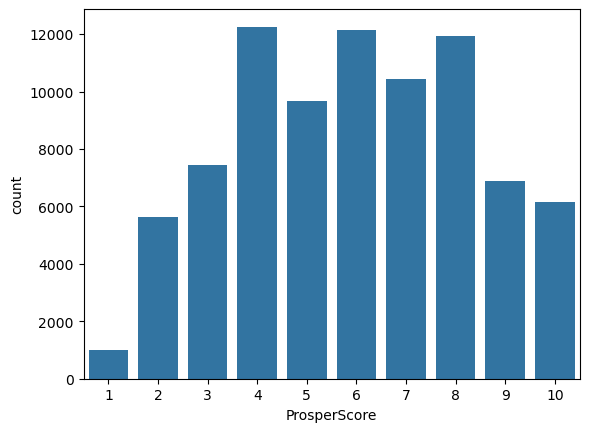

In [12]:
#Define function to convert any Prosper score that is 11 to 10, which should be the Maximum , 10, as per the data dictionary.
def calibrate(x):
    if x == 11:
        return 10
    else:
        return x

base_color = sb.color_palette()[0]

#define the order to be used to plot the data as it is ordinal.
order = [x for x in range(1,11,1)]

loans_df['ProsperScore'] = loans_df['ProsperScore'].apply(calibrate)
loans_df['ProsperScore'].value_counts()

#create an ordered countplot since we are dealing with ordinal data.
sb.countplot(x = loans_df['ProsperScore'],color = base_color, order = order);

We can observe that the `ProsperScore` is distributed around the mid values with the most loans having a score of 4, 6 and 8 respectively.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The numerical variables of interest `MonthlyLoanRepayment`, `BorrowerAPR` are not normally distributed nor unimodal. We also note that `isBorrowerHomeowner` is split at 53% and 47% for owners and non_owners respectively while the `ProsperScore` has three peaks at 4, 6 and 8 respectively. I did not do any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There is an unsual peak in the distribution of the `Borrower_APR` at around 0.35. I did not do any operations to tidy the data.

## Bivariate Exploration

##### In this section, we will further investigate the relationship between our main variables of interest and other variables. Of major interest is how the BorrowerAPR is related to other features. Some of the questions we will attempt to answer are:

1. How has the `BorrowerAPR` changed over time?
2. What is the relationship between `BorrowerAPR`and `BorrowerRate`?
3. Is there a relationship between `BorrowerAPR` and `OpenCreditLines`?
4. What is the distribution of `LoanOriginalAmount` for various  `IncomeRange`?
5. What is the relationship between `LoanTerm` and `EmploymentStatus`?
6. What is the distribution of `BorrowerAPR` for different `ProsperScore`?
7. What is the relationship between different numeric variables?

1. How has the `BorrowerAPR` changed over time?

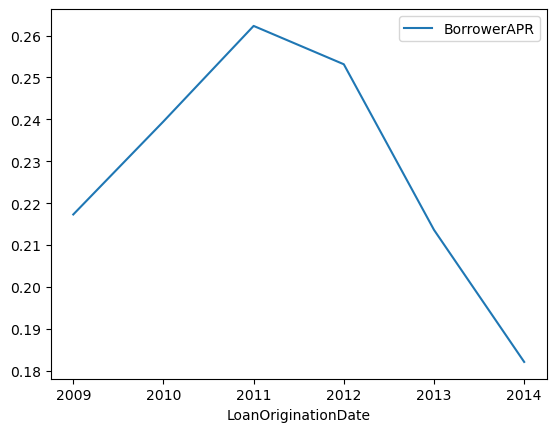

In [13]:
#Plot the change in the average borrower APR over the years
APR_trend = loans_df.groupby(loans_df['LoanOriginationDate'].dt.year).aggregate({'BorrowerAPR':'mean'})

sb.lineplot(data=APR_trend);

We can observe that the `BorrowerAPR` trend is almost V-shaped.There was a steady rise until it peaked in 2011 after which it steadily declined.

2. What is the relationship between `BorrowerAPR`and `BorrowerRate`?

Text(0, 0.5, 'BorrowerAPR')

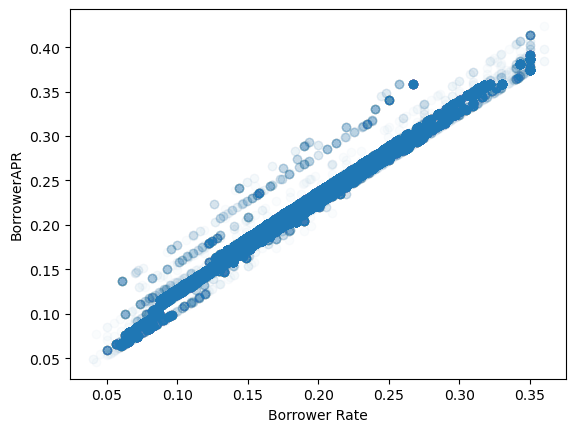

In [18]:
plt.scatter(data = loans_df, y='BorrowerAPR', x='BorrowerRate', alpha=1/50);
plt.xlabel('Borrower Rate')
plt.ylabel('BorrowerAPR')

`BorrowerAPR` and `ProsperScore` are very linearly correlated.

3. Is there a relationship between `BorrowerAPR` and `OpenCreditLines`?


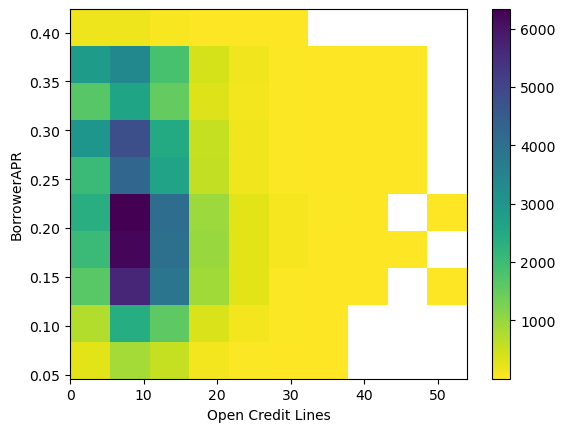

In [19]:
plt.hist2d(data=loans_df, y='BorrowerAPR', x='OpenCreditLines',cmin=0.5, cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Open Credit Lines')
plt.ylabel('BorrowerAPR');

There does not seem to be a strong relationship between the `BorrowerAPR` and the number of `OpenCreditLines`. We can note however note that most loans are taken by people who have between 5 and 10 credit lines.

4. What is the distribution of `LoanOriginalAmount` for various  `IncomeRange`?

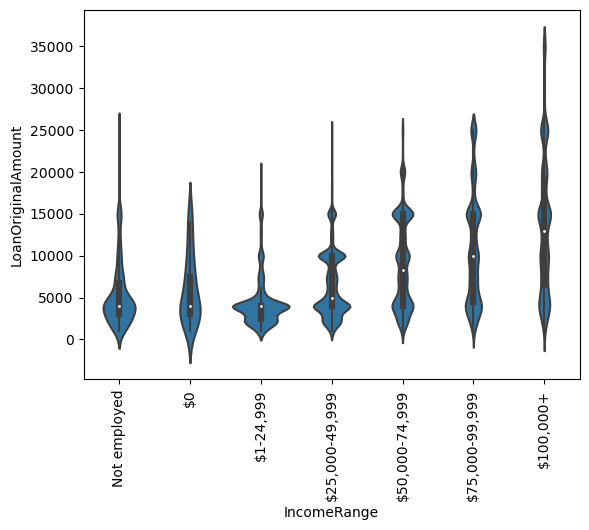

In [20]:
#create a variable to use in creating a categorical type 
income_ranges = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

income_classes = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)

#convert the dtype of IncomeRange to a categorical type
loans_df['IncomeRange'] = loans_df['IncomeRange'].astype(income_classes)


sb.violinplot(data = loans_df, x='IncomeRange', y='LoanOriginalAmount', color = base_color)

plt.xticks(rotation = 90);

We observe that the median `LoanOriginalAmount` seems to go up with the `IncomeRange`.

5. What is the relationship between `LoanTerm` and `EmploymentStatus`?

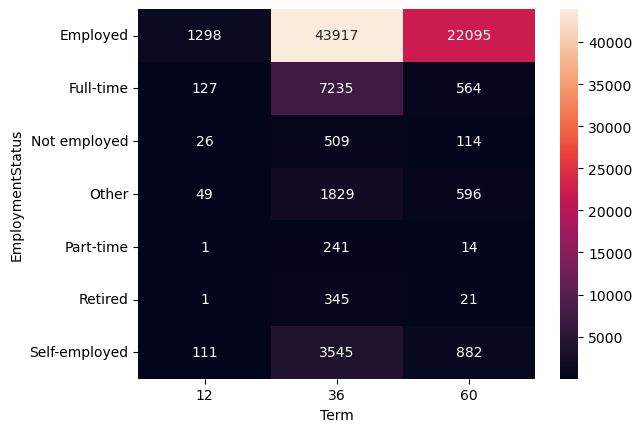

In [21]:

employment_vs_terms = loans_df.groupby(['EmploymentStatus','Term']).size()
employment_vs_terms = employment_vs_terms.reset_index(name='count')

#Pivot the columns to allow for ease of plotting
employment_vs_terms = employment_vs_terms.pivot(index='EmploymentStatus', columns=['Term'], values='count')

#create a heatmap using seaborn.
sb.heatmap(employment_vs_terms, annot = True, fmt='d');


Employed borrowers, whether *Employed, Full-time* or *self-employed* seem to be getting longer payment terms that those who are not.

6. What is the distribution of `BorrowerAPR` for different `PropserScore`?

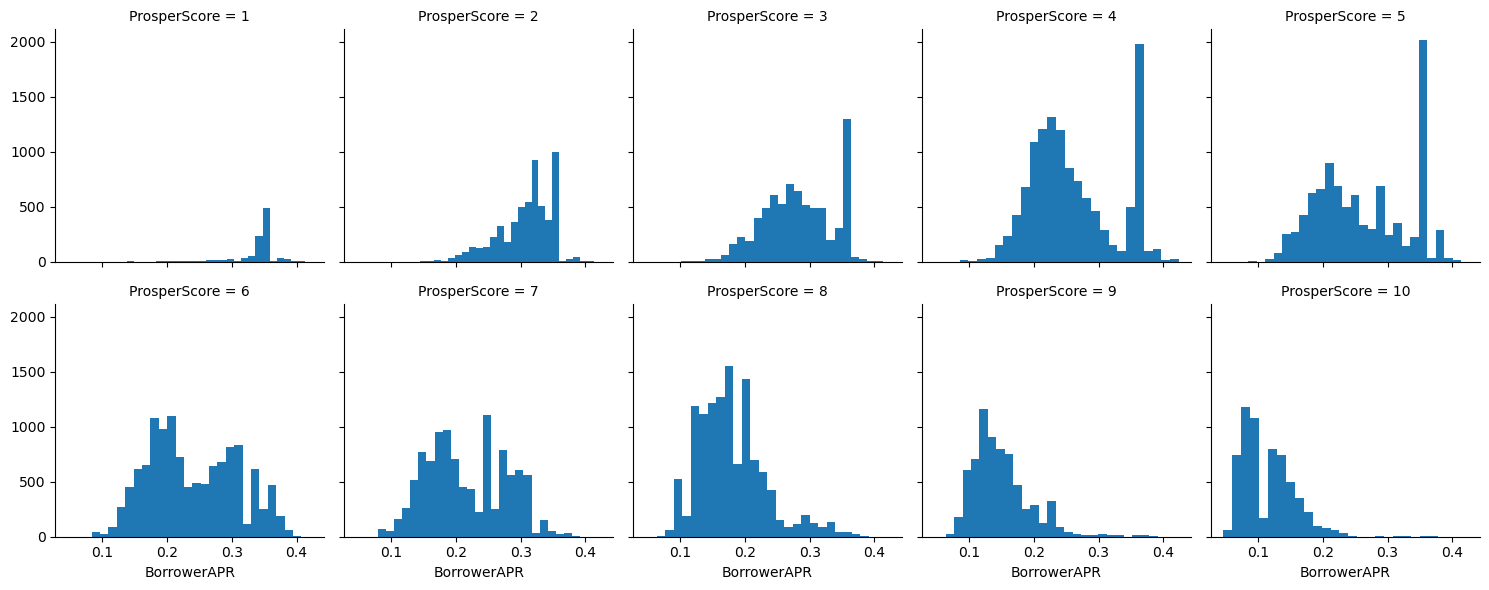

In [22]:
prosper_scores = [x for x in range(1,11)]
ps_class = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_scores)

loans_df['ProsperScore'] = loans_df['ProsperScore'].astype(ps_class)

g= sb.FacetGrid(data=loans_df, col='ProsperScore', col_wrap=5)
g.map(plt.hist,'BorrowerAPR', bins=25);

We can observe through the facet grid that the distribution of the `BorrowerAPR` changes from a negative to a positive skew as we move from a high risk to low risk prosper scores.

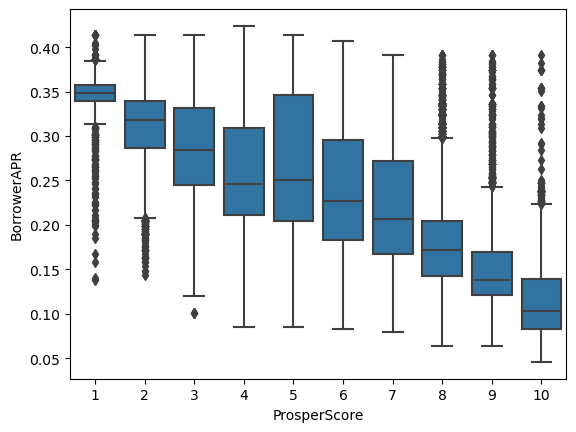

In [23]:
#plot a boxplot to confirm findings from the facet grid above
sb.boxplot(data=loans_df, x='ProsperScore', y='BorrowerAPR', color=base_color);

7. What is the relationship between different numeric variables?

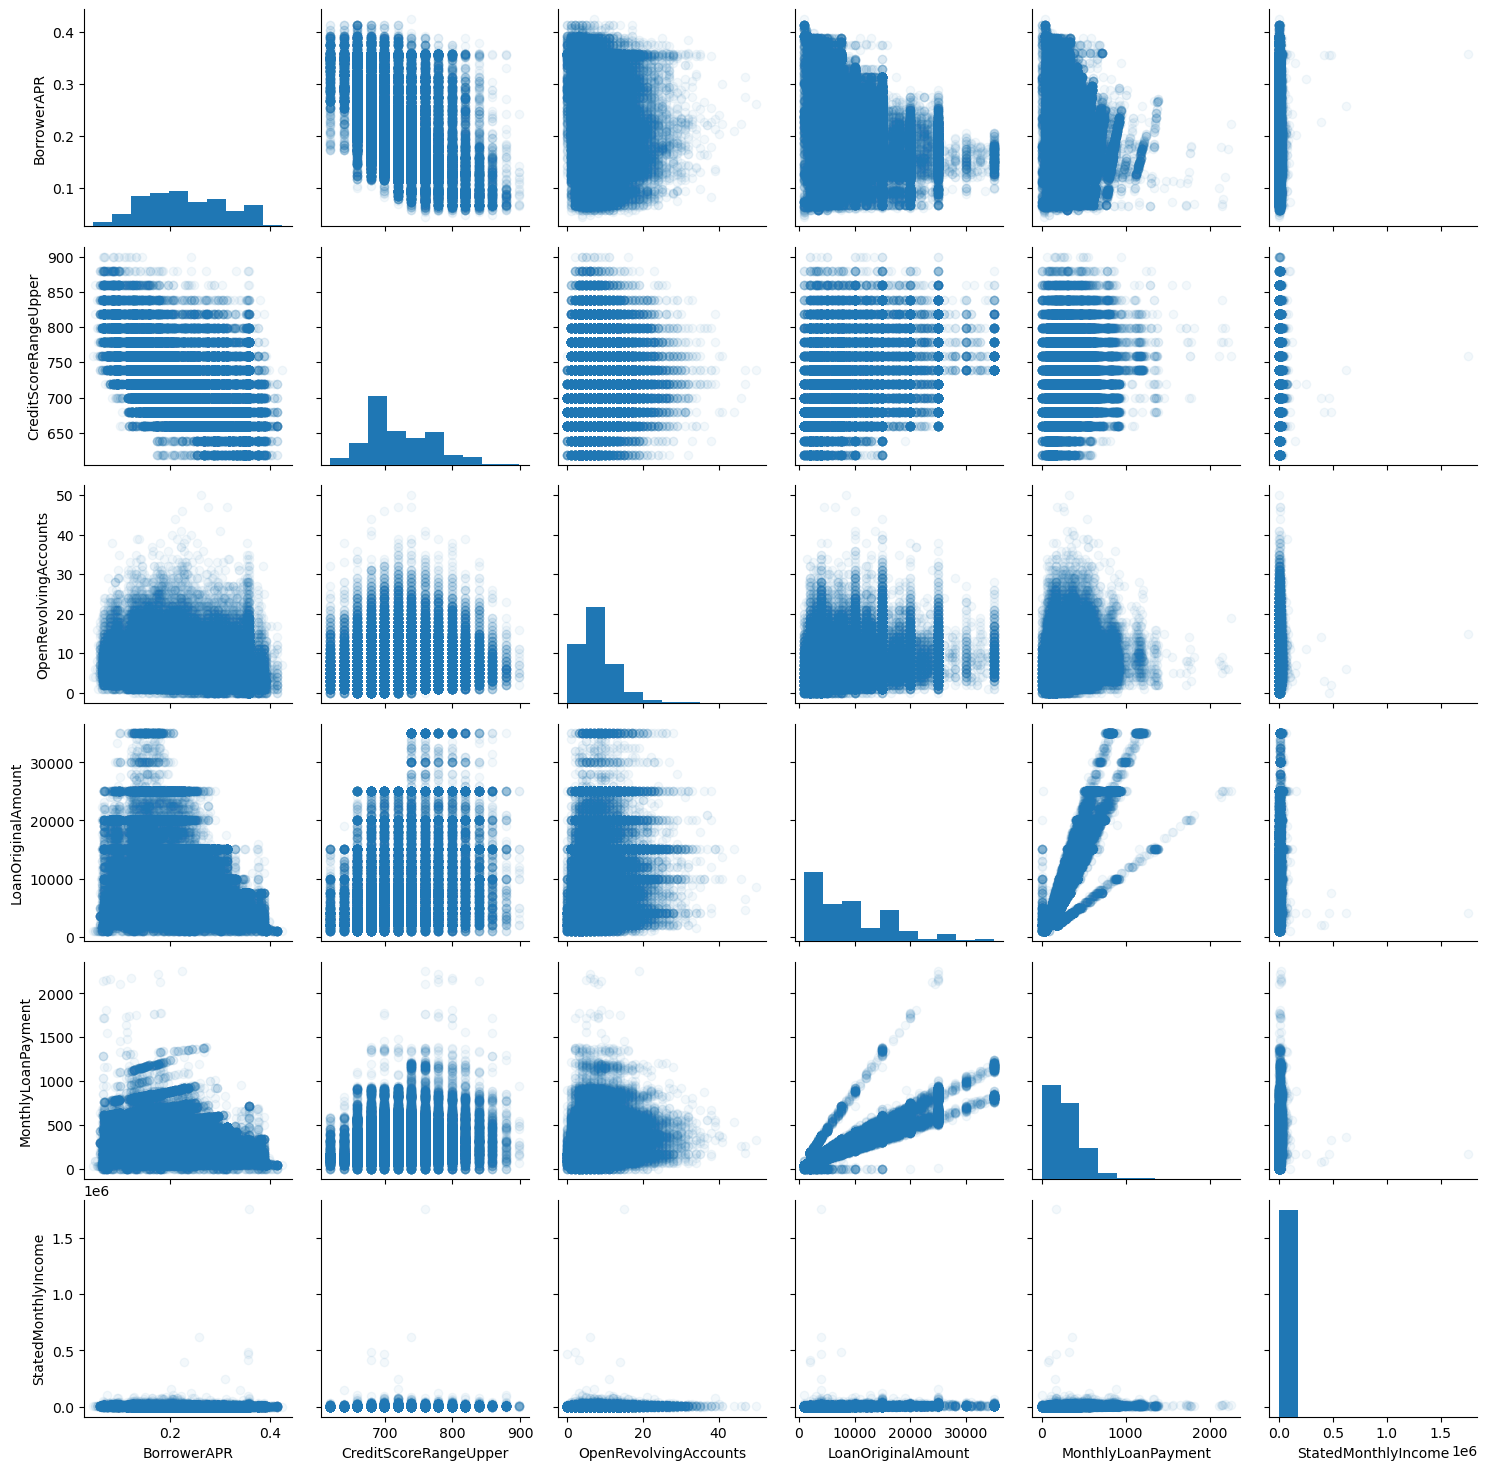

In [37]:
#create a pair grid for some of the  numerical variables in our dataset
fig2 = sb.PairGrid(data=loans_df, vars=['BorrowerAPR','CreditScoreRangeUpper',
       'OpenRevolvingAccounts', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'StatedMonthlyIncome'])

#plot a histogram for the diagonal plots
fig2.map_diag(plt.hist)

#draw a scatter plot on the non_diagonal line to show relationships between the variables
fig2.map_offdiag(plt.scatter, alpha= 1/20);

There are various relationships displayed between the many variables. 
The `StatedMonthlyIncome` variable seems to contain an outlier so we may have to clean it for further analysis. We also see an sort of inverse relationship between `BorrowerAPR` and `CreditScoreRangeUpper`, although with a lot of variance, where it seems like the *borrower apr* decreases as the *credit score upper range* increases.
There seems to be an interesting relationship between `LoanOriginalAmount` and `CreditScoreRangeUpper`, with the scatter plot looking like a staircase. Another interesting one is the `LoanOrignalAmount` and `MonthlyLoanPayment`, where there seems to be different correlation lines, probably due to the effect of a third variable like `Term`.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We observed a very strong correlation between `BorrowerAPR` and `BorrowerRate`. Also we saw that higher `IncomeRange` seems to give borrowers a higher `LoanOriginalAmount`.
The risk level as shown by the `ProsperScore` seems is also correlated with the `BorrowerAPR` where we note that as the risk level reduces, so does the `BorrowerAPR`. There does not seem to be a relationship between the number of `OpenCreditLines` and `BorrowerAPI`, thought it is good to note that most borrowers have between 5 and 10 open credit lines.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was interesting to note a relationship between `EmploymentStatus` and `Term` where we note that those employed seem to enjoying longer payment terms than those who are not. However, it is also good to note that generally, for all employment statuses, the preference is towards the longer term loans.
Another interesting one is the `LoanOrignalAmount` and `MonthlyLoanPayment`, where there seems to be different correlation lines, probably due to the effect of a third variable like `Term`.

## Multivariate Exploration

#### At this point, it would be interesting to see how some of the other variables vary in relation to the main variables.
We will seek to answer the following questions:


1. What is the relationship between the `BorrowerAPR`, `IncomeRange` and loan `Term`?
2. How does the `BorrowerAPR` vary based on `EmploymentStatus` and `LoanOriginalAmount` taken?
3. Is there a difference in the `BorrowerAPR` between those who own homes(`isBorrowerHomeowner`) and those who don't, for the different numeric `ListingCategory (numeric)`?

2. What is the relationship between the `BorrowerAPR`, `IncomeRange` and loan `Term`?

c:\Users\Mobius\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


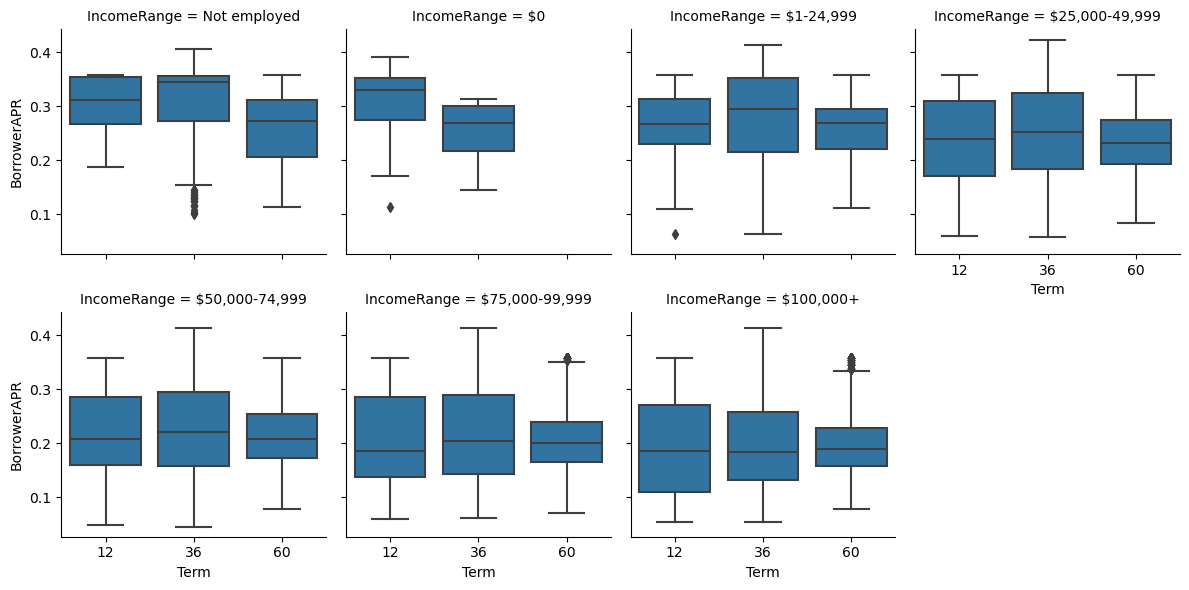

In [21]:
# draw boxplots showing the relationship between Term and BorrowerAPR, faceted by IncomeRange
fig_3 = sb.FacetGrid(data=loans_df, col='IncomeRange', col_wrap=4)

fig_3.map(sb.boxplot,'Term','BorrowerAPR');

The `BorrowerAPR` seems to be highest for the 36 term loans as compared to both the 12 month and 60 month term loans for most income ranges, though generally, the `BorrowerAPR` is lower for higher income groups.

3. How does the `BorrowerAPR` vary based on `EmploymentStatus` and `LoanOriginalAmount` taken?

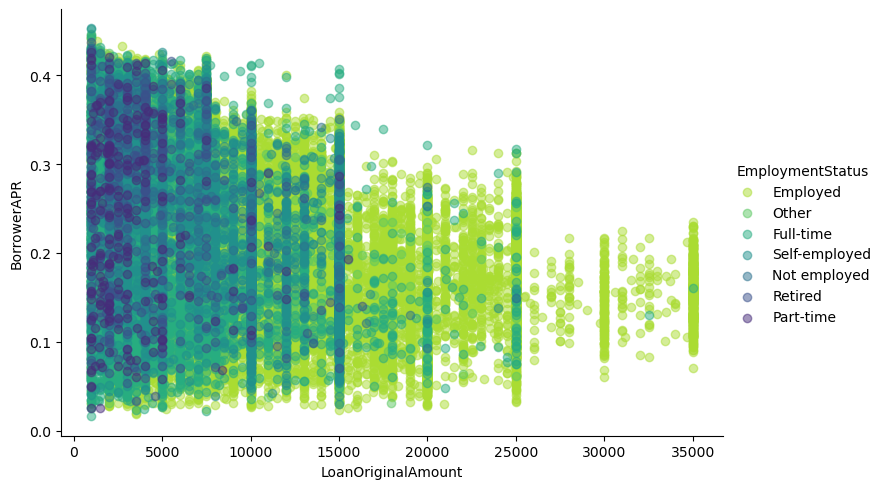

In [22]:
fig_4 = sb.FacetGrid(data=loans_df, hue='EmploymentStatus', height=5, aspect=1.5,palette='viridis_r')

fig_4.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR',x_jitter = 0.4,y_jitter = 0.04,fit_reg = False, scatter_kws={'alpha':1/2})

fig_4.add_legend();


We observe from the color encoding that employed people seem to be able to access larger borrowing amounts and a relatively lower borrower APR.

4. Is there a difference in the `BorrowerAPR` between those who own homes(`isBorrowerHomeowner`) and those who don't, for the different numeric `ListingCategory (numeric)`?

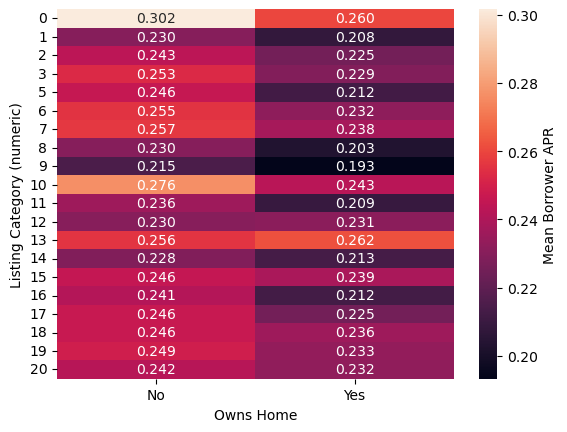

In [23]:
cat_APR_mean = loans_df.groupby(['IsBorrowerHomeowner', 'ListingCategory (numeric)'])['BorrowerAPR'].mean()
cat_APR_mean = cat_APR_mean.reset_index(name = 'APR_mean')
cat_APR_mean = cat_APR_mean.pivot(index = 'ListingCategory (numeric)',columns = 'IsBorrowerHomeowner', values = 'APR_mean')
sb.heatmap(cat_APR_mean, annot=True, fmt='.3f', cbar_kws = {'label':'Mean Borrower APR'})
plt.ylabel('Listing Category (numeric)')
plt.xlabel('Owns Home')
plt.yticks(rotation = 0);
plt.xticks(ticks = [0.5,1.5],labels = ['No','Yes']);

We can tell that borrowers who own homes get a lower borrower APR on average than those who don't and that is across all listing categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We observed a couple of relationships between the main variables of interests by themselves and with other features. For example, we saw that ` BorroweAPR` has a sort of inverse relationship with `CreditScoreUpperRange`. We can also tell that on average home owners enjoy a lower `borrowerAPR`. Some of the features that seem to strengthen each other are the `LoanOriginalAmount` and `EmploymentStatus`.

### Were there any interesting or surprising interactions between features?

Yes, there seems to be an interesting relationship between `LoanOriginalAmount` and `CreditScoreRangeUpper`, with the scatter plot looking like a staircase. Another interesting one is the `LoanOrignalAmount` and `MonthlyLoanPayment`, where there seems to be different correlation lines, probably due to the effect of a third variable like `Term`.

## Conclusions
For this EDA, we were mainly interested in identifying the relationship between the `BorrowerAPR` and categorical variables such as `Term`,`ProsperScore`,`IncomeRange` and so on.

Before starting our analysis through visualisations, we first subset the data to remain with our main variables of interest and other supporting variables. We then performed some wrangling to get rid of missing values and duplicates and also converted the data types of some of the variables to the appropriate ones.

We started by first plotting univariate charts of our main variables of interest so as to establish their distribution and get a feel of the data. We then proceeded to perform bivariate analysis where we explored relationships between the main variables of interest and other features as well.Eventually we dug further by plotting multivariate charts to further highlight the relationship between our main variable of interest, `BorrowerAPR`, and combinations of 2 other features.

Our key findings are that `BorrowerAPR` is affected by a number of factors including the income range, home ownership and the custom prosper score.

For further analysis, I would focus on more numerical variables to investigate their correlations to the main varaibles of interest.
